# Euler-Lagrange | Pesas acopladas rotando en torno a eje

[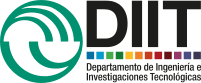](https://ingenieria.unlam.edu.ar/)    
[cc-by-sa](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
> [Landau $\S$5 ej. 4]

Calcular el Lagrangiano para el sistema de figura donde la partícula con \\(m_2\\) se desplaza sobre un eje vertical, y todo el sistema gira con una velocidad angular constante \\(\Omega\\) en torno a ese eje.

![](figuras/landauS52_fig4.png)

In [1]:
# módulo de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales
import warnings
warnings.filterwarnings("ignore")

## Variables

In [2]:
# Defino los parámetros físicos del sistema
m1, m2, g, a, Omega = sym.symbols('m_1, m_2, g, a, Omega', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
theta = sym.Function('theta')(t)

## Posición

Pongo el origen del sistema de coordenadas en el punto A con $\hat{z}$ orientado hacia arriba.
Utilizaré coordenadas cartesianas.

In [3]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posiciones
m1a_r = a* ( sym.sin(theta)* ( sym.cos(Omega* t)* N.x  + sym.sin(Omega* t)* N.y ) - sym.cos(theta)* N.z) 
m1b_r = a* ( sym.sin(theta)* ( sym.cos(Omega* t+ sym.pi)* N.x  + sym.sin(Omega* t+ sym.pi)* N.y ) - sym.cos(theta)* N.z)
m2_r = 2* a * (- sym.cos(theta)* N.z)

In [4]:
m1a_r

In [5]:
m1b_r

In [6]:
m2_r

## Energía cinética

In [7]:
# velocidades
m1a_v = m1a_r.diff(t,N)
m1b_v = m1b_r.diff(t,N)
m2_v = m2_r.diff(t,N)

# energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m1a_T = unMedio* m1* m1a_v.dot(m1a_v)
m1b_T = unMedio* m1* m1b_v.dot(m1b_v)
m2_T = unMedio* m2* m2_v.dot(m2_v)
T = sym.Eq(sym.Symbol('T'), m1a_T + m1b_T + m2_T).simplify() # simplify: simplifica usando factor común y otras operaciones
T

## Energía potencial

Como vimos, estableciendo la usual $V(z_0=0)=0$ nos queda
$$
V= m (- g z),
$$
que puede calcularse como
$$
V = - \vec{P} \cdot \vec{r} = - (m \vec{g}) \cdot \vec{r}
$$

Solo nos ocupa tener la componente en $\hat{y}$ de la pesa de $m_2$.
Esto se obtiene de multiplicar (producto punto) su posición $\vec{r}_2$ con el versor $\hat{z}$.

In [8]:
# Energía potencial
m1a_V = -(m1* (-g* N.z)).dot(m1a_r) # g apunta en contra de z
m1b_V = -(m1* (-g* N.z)).dot(m1b_r)
m2_V = -(m2* (-g* N.z)).dot(m2_r)
V = sym.Eq(sym.Symbol('V'), m1a_V + m1b_V + m2_V).simplify() # simplify: simplifica usando factor común y otras operaciones
V

## Resolución en cilíndricas

In [9]:
p = mech.ReferenceFrame('p', indices=(r'\rho', r'\varphi', 'z') ) # sistema de referencia cilíndrico
m1a_r_cil = a* sym.sin(theta)* p.x + (Omega* t)* p.y + (- sym.cos(theta))* p.z 
m1b_r_cil = a* sym.sin(theta)* p.x + (Omega* t+ sym.pi)* p.y + (- sym.cos(theta))* p.z 
m2_r_cil = 2* a * (- sym.cos(theta)* p.z)

In [10]:
m1a_r_cil

In [11]:
m1b_r_cil

In [12]:
m2_r_cil

Y hay que seguir...